**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving QCOM.csv to QCOM.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['QCOM.csv']))
df

Date Close/Last    Volume      Open       High      Low
0     06/09/2021    $132.89   6717243  $135.105    $135.35  $132.79
1     06/08/2021     $134.2   9657889   $134.06  $135.3895     $133
2     06/07/2021    $133.32   5563253    $133.7    $133.77  $132.64
3     06/04/2021    $134.34   7416675  $132.525    $135.05   $132.2
4     06/03/2021    $131.78   6643997   $132.65    $133.39  $131.42
...          ...        ...       ...       ...        ...      ...
2511  06/16/2011     $52.99  19440800    $54.12     $54.21   $52.42
2512  06/15/2011      $54.1  16748740    $55.23     $55.56    $53.8
2513  06/14/2011     $55.58  11995730    $54.87     $55.87   $54.75
2514  06/13/2011      $54.4  10670650    $54.79     $54.89   $54.24
2515  06/10/2011      $54.6  14524760     $55.7     $55.74  $54.355

[2516 rows x 6 columns]

In [4]:
df.rename(columns = {'Close/Last':'Close'}, inplace = True)

In [5]:
df.head()

Date    Close   Volume      Open       High      Low
0  06/09/2021  $132.89  6717243  $135.105    $135.35  $132.79
1  06/08/2021   $134.2  9657889   $134.06  $135.3895     $133
2  06/07/2021  $133.32  5563253    $133.7    $133.77  $132.64
3  06/04/2021  $134.34  7416675  $132.525    $135.05   $132.2
4  06/03/2021  $131.78  6643997   $132.65    $133.39  $131.42

In [6]:
df.tail()

Date   Close    Volume    Open    High      Low
2511  06/16/2011  $52.99  19440800  $54.12  $54.21   $52.42
2512  06/15/2011   $54.1  16748740  $55.23  $55.56    $53.8
2513  06/14/2011  $55.58  11995730  $54.87  $55.87   $54.75
2514  06/13/2011   $54.4  10670650  $54.79  $54.89   $54.24
2515  06/10/2011   $54.6  14524760   $55.7  $55.74  $54.355

In [7]:
df.dtypes

Date      object
Close     object
Volume     int64
Open      object
High      object
Low       object
dtype: object

In [8]:
df.Close=df.Close.str.replace('$', ' ')
df.Open=df.Open.str.replace('$', ' ')
df.High=df.High.str.replace('$', ' ')
df.Low=df.Low.str.replace('$', ' ')

In [9]:
df[['Close','Open','High','Low']]=df[['Close','Open','High','Low']].apply(pd.to_numeric)

In [10]:
df.Date=pd.to_datetime(df.Date)

In [11]:
df.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Open             float64
High             float64
Low              float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   Close   2516 non-null   float64       
 2   Volume  2516 non-null   int64         
 3   Open    2516 non-null   float64       
 4   High    2516 non-null   float64       
 5   Low     2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [13]:
df.shape

(2516, 6)

In [14]:
df.describe()

Close        Volume         Open         High          Low
count  2516.000000  2.516000e+03  2516.000000  2516.000000  2516.000000
mean     70.716720  1.172424e+07    70.719193    71.476072    69.950835
std      22.389306  7.399784e+06    22.442521    22.739970    22.071313
min      42.960000  2.120165e+06    42.510000    43.290000    42.240000
25%      56.737500  7.739491e+06    56.610000    57.257500    56.139825
50%      65.195000  1.008450e+07    65.145000    65.805000    64.545000
75%      74.830000  1.338639e+07    74.830000    75.555000    74.117500
max     164.780000  1.559539e+08   167.577000   167.940000   164.440000

In [15]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [16]:
duplicatedata=df.duplicated()
print(duplicatedata.sum())
df[duplicatedata]

0


Empty DataFrame
Columns: [Date, Close, Volume, Open, High, Low]
Index: []

In [17]:
df.count()

Date      2516
Close     2516
Volume    2516
Open      2516
High      2516
Low       2516
dtype: int64

**OUTLIERS**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot.



<function matplotlib.pyplot.show>

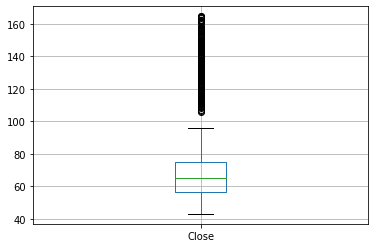

In [18]:
df.boxplot(column='Close')
plt.show

<function matplotlib.pyplot.show>

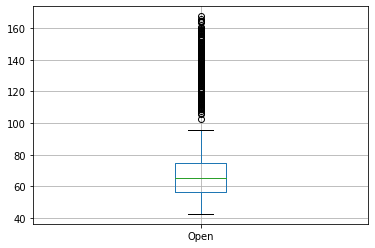

In [19]:
df.boxplot(column='Open')
plt.show

<function matplotlib.pyplot.show>

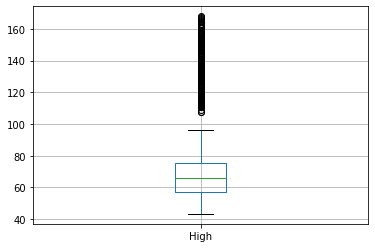

In [20]:
df.boxplot(column='High')
plt.show

<function matplotlib.pyplot.show>

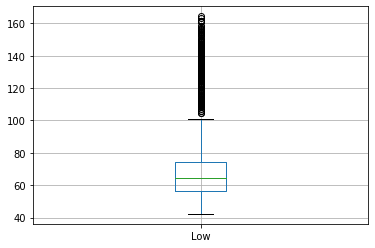

In [21]:
df.boxplot(column='Low')
plt.show

<function matplotlib.pyplot.show>

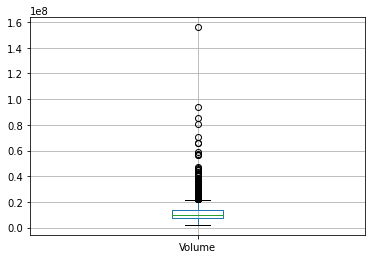

In [22]:
df.boxplot(column='Volume')
plt.show

Looking at the box plot, it seems that the variables VOLUME,HIGH,LOW,OPEN,CLOSE_LAST have outlier present in the variables. These outliers value needs to be teated and there are several ways of treating them:

Drop the outlier value Replace the outlier value using the IQR

In [23]:
def remove_outliners(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  l_range= Q1-(1.5*IQR)
  u_range= Q3+(1.5*IQR)
  return l_range,u_range

In [24]:
x,y=remove_outliners(df['Volume'])
df['Volume']=np.where(df['Volume']>y, y, df['Volume'])
df['Volume']=np.where(df['Volume']<x, x, df['Volume'])

<function matplotlib.pyplot.show>

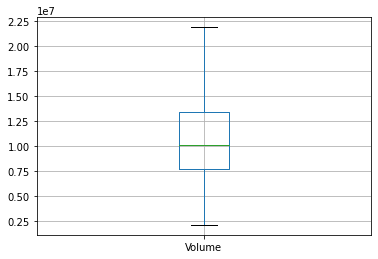

In [25]:
df.boxplot(column='Volume')
plt.show

In [26]:
x,y=remove_outliners(df['High'])
df['High']=np.where(df['High']>y, y, df['High'])
df['High']=np.where(df['High']<x, x, df['High'])

<function matplotlib.pyplot.show>

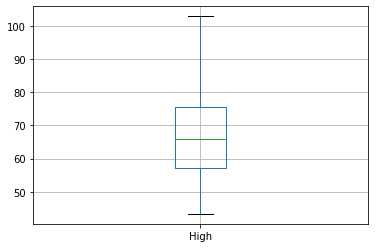

In [27]:
df.boxplot(column='High')
plt.show

In [28]:
x,y=remove_outliners(df['Low'])
df['Low']=np.where(df['Low']>y, y, df['Low'])
df['Low']=np.where(df['Low']<x, x, df['Low'])

<function matplotlib.pyplot.show>

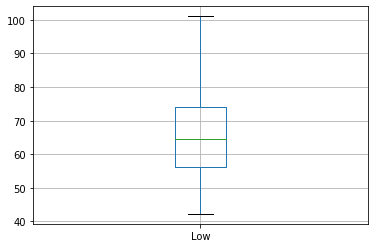

In [29]:
df.boxplot(column='Low')
plt.show

In [30]:
x,y=remove_outliners(df['Open'])
df['Open']=np.where(df['Open']>y, y, df['Open'])
df['Open']=np.where(df['Open']<x, x, df['Open'])

<function matplotlib.pyplot.show>

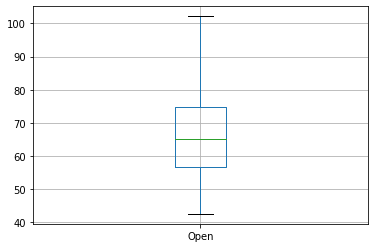

In [31]:
df.boxplot(column='Open')
plt.show

In [32]:
x,y=remove_outliners(df['Close'])
df['Close']=np.where(df['Close']>y, y, df['Close'])
df['Close']=np.where(df['Close']<x, x, df['Close'])

<function matplotlib.pyplot.show>

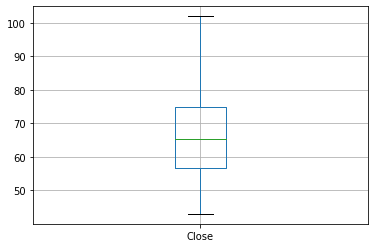

In [33]:
df.boxplot(column='Close')
plt.show

In [34]:
df.shape

(2516, 6)

**CORRELATION BETWEEN VARIABLES**



In [35]:
df.corr()

Close    Volume      Open      High       Low
Close   1.000000 -0.226333  0.997976  0.998971  0.998899
Volume -0.226333  1.000000 -0.222755 -0.209645 -0.238088
Open    0.997976 -0.222755  1.000000  0.998864  0.999013
High    0.998971 -0.209645  0.998864  1.000000  0.998239
Low     0.998899 -0.238088  0.999013  0.998239  1.000000

**VISUALIZING DATA**

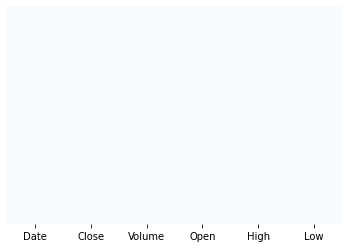

In [36]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

The above heatmap represents that there are no null values in our data

**HISTOGRAMS**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8557930f50>,
      dtype=object)

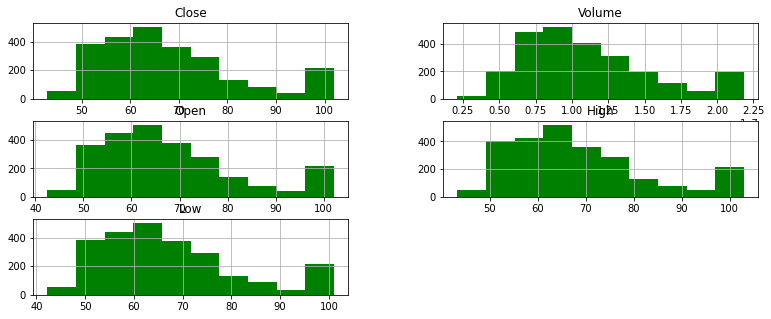

In [37]:
df.hist(bins = 10, figsize = (13,5), color = 'g')

The above graphs represents **binning** of the data.

**HEATMAPS**

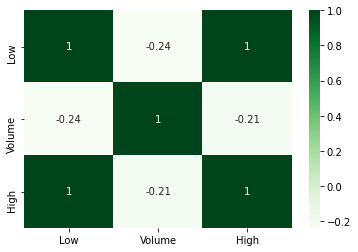

In [43]:
sns.heatmap(df[['Low','Volume','High']].corr(), annot=True, cmap = 'Greens')
plt.show()

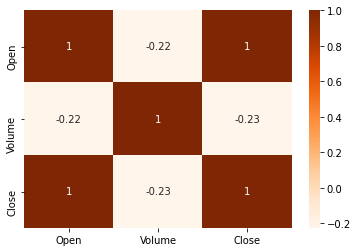

In [44]:
sns.heatmap(df[['Open','Volume','Close']].corr(), annot=True, cmap = 'Oranges')
plt.show()

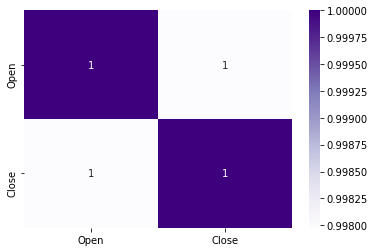

In [45]:
sns.heatmap(df[['Open','Close']].corr(), annot=True, cmap = 'Purples')
plt.show()

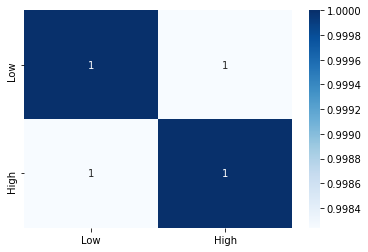

In [46]:
sns.heatmap(df[['Low','High']].corr(), annot=True, cmap = 'Blues')
plt.show()

In [47]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

Date      Close      Volume    Open       High         Low  Year
0    2021-06-09  101.96875   6717243.0  102.16  103.00125  101.084012  2021
1    2021-06-08  101.96875   9657889.0  102.16  103.00125  101.084012  2021
2    2021-06-07  101.96875   5563253.0  102.16  103.00125  101.084012  2021
3    2021-06-04  101.96875   7416675.0  102.16  103.00125  101.084012  2021
4    2021-06-03  101.96875   6643997.0  102.16  103.00125  101.084012  2021
...         ...        ...         ...     ...        ...         ...   ...
2511 2011-06-16   52.99000  19440800.0   54.12   54.21000   52.420000  2011
2512 2011-06-15   54.10000  16748740.0   55.23   55.56000   53.800000  2011
2513 2011-06-14   55.58000  11995730.0   54.87   55.87000   54.750000  2011
2514 2011-06-13   54.40000  10670650.0   54.79   54.89000   54.240000  2011
2515 2011-06-10   54.60000  14524760.0   55.70   55.74000   54.355000  2011

[2516 rows x 7 columns]

**TIME SERIES GRAPHS/LINE PLOTS**

In [48]:
df=df.set_index('Year')

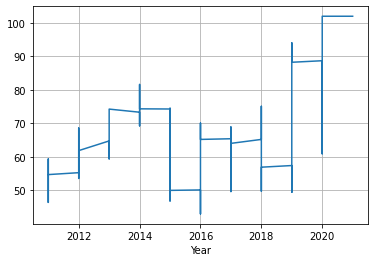

In [49]:
df['Close'].plot(grid=True)

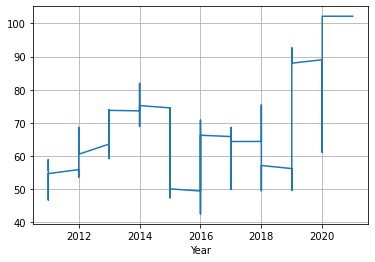

In [50]:
df['Open'].plot(grid=True)

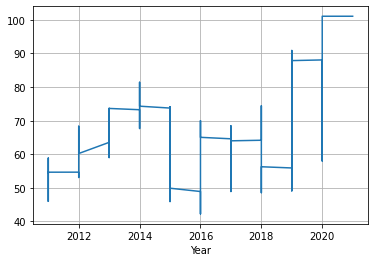

In [51]:
df['Low'].plot(grid=True)

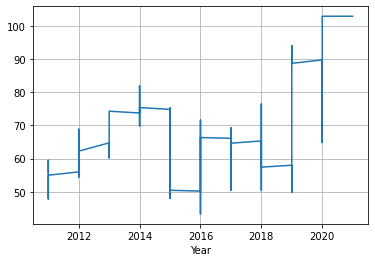

In [52]:
df['High'].plot(grid=True)

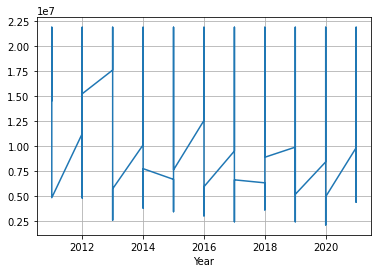

In [53]:
df['Volume'].plot(grid=True)

**SCATTER PLOTS**

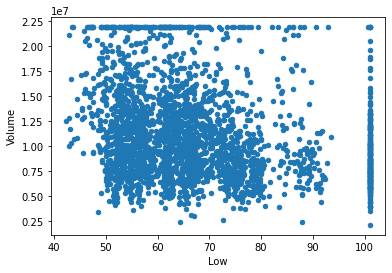

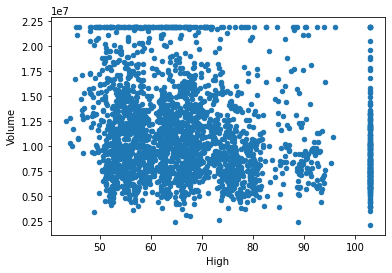

In [54]:
df.plot.scatter(x="Low",y="Volume")
plt.show()
df.plot.scatter(x="High",y="Volume")
plt.show()

In [55]:
df[['Low','Volume','High']].corr()

Low    Volume      High
Low     1.000000 -0.238088  0.998239
Volume -0.238088  1.000000 -0.209645
High    0.998239 -0.209645  1.000000

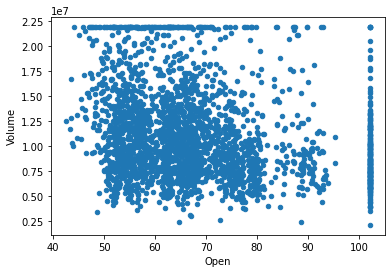

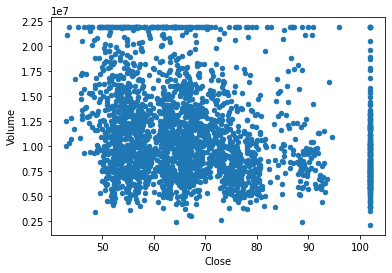

In [56]:
df.plot.scatter(x="Open",y="Volume")
plt.show()
df.plot.scatter(x="Close",y="Volume")
plt.show()

In [57]:
df[['Open','Volume','Close']].corr()

Open    Volume     Close
Open    1.000000 -0.222755  0.997976
Volume -0.222755  1.000000 -0.226333
Close   0.997976 -0.226333  1.000000

**Kernel Density Estimate plot using Gaussian kernels.**

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.

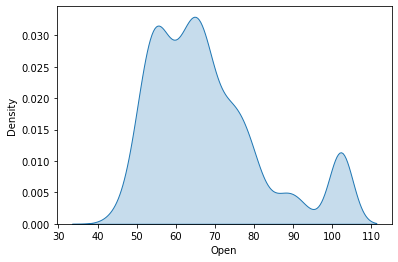

In [58]:
sns.kdeplot(data=df['Open'], shade=True)

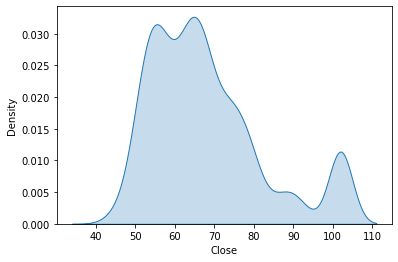

In [59]:
sns.kdeplot(data=df['Close'], shade=True)

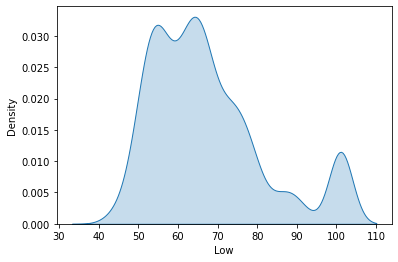

In [60]:
sns.kdeplot(data=df['Low'], shade=True)

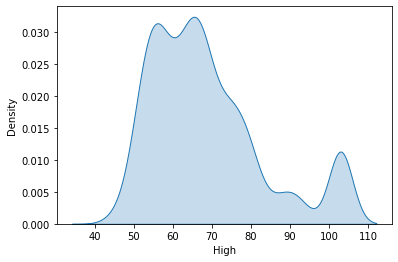

In [61]:
sns.kdeplot(data=df['High'], shade=True)

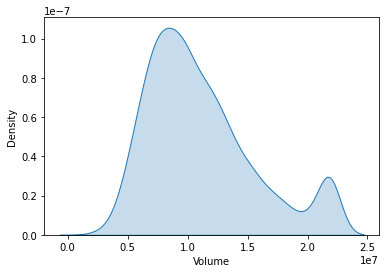

In [62]:
sns.kdeplot(data=df['Volume'], shade=True)

**IMPORTING HEADLINES FILES**

In [63]:
from google.colab import files
uploaded = files.upload()

Saving Headlines_2015.csv to Headlines_2015.csv
Saving Headlines_2016.csv to Headlines_2016.csv
Saving Headlines_2017.csv to Headlines_2017.csv
Saving Headlines_2018.csv to Headlines_2018.csv
Saving Headlines_2019.csv to Headlines_2019.csv
Saving Headlines_2020.csv to Headlines_2020.csv
Saving Headlines_2021.csv to Headlines_2021.csv


In [64]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['Headlines_2015.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['Headlines_2016.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['Headlines_2017.csv']))
df4 = pd.read_csv(io.BytesIO(uploaded['Headlines_2018.csv']))
df5 = pd.read_csv(io.BytesIO(uploaded['Headlines_2019.csv']))
df6 = pd.read_csv(io.BytesIO(uploaded['Headlines_2020.csv']))
df7 = pd.read_csv(io.BytesIO(uploaded['Headlines_2021.csv']))

In [65]:
news=pd.concat([df1,df2,df3,df4,df5,df6,df7])
news

Date                                          Headlines
0    2015-01-01  What Can We Expect From Apple Inc. In 2015? 1 ...
1    2015-01-02  What to expect from Apple in 2015 beyond its s...
2    2015-01-03  Mountie: An inexpensive and innovative way to ...
3    2015-01-04  Donald Yacktman on the Sources of Moats, His C...
4    2015-01-05  SIM-free iPhone 6, 6 Plus reportedly debuting ...
..          ...                                                ...
169  2021-06-19  Best pre-Prime Day smartwatch deals on Apple W...
170  2021-06-20  iPhone 13 rumors: As Apple's fall event gets c...
171  2021-06-21  Apple is shortening new free TV Plus trials fr...
172  2021-06-22  Google likely to soon face antitrust claims ov...
173  2021-06-23  French court sets date in Apple case over App ...

[2365 rows x 2 columns]

In [66]:
news.Date=pd.to_datetime(news.Date)
news['Date'] = pd.to_datetime(news['Date'],format='%Y%m%d')
news['Date']

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
169   2021-06-19
170   2021-06-20
171   2021-06-21
172   2021-06-22
173   2021-06-23
Name: Date, Length: 2365, dtype: datetime64[ns]

In [67]:
news.dtypes

Date         datetime64[ns]
Headlines            object
dtype: object

In [68]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2365 entries, 0 to 173
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2365 non-null   datetime64[ns]
 1   Headlines  2365 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 55.4+ KB


In [69]:
news.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


Date                                          Headlines
count                  2365                                               2365
unique                 2335                                               2332
top     2019-11-15 00:00:00  MasterCard is expanding its mobile wallet in S...
freq                      2                                                  3
first   2015-01-01 00:00:00                                                NaN
last    2021-06-23 00:00:00                                                NaN

In [70]:
news['Headlines']

0      What Can We Expect From Apple Inc. In 2015? 1 ...
1      What to expect from Apple in 2015 beyond its s...
2      Mountie: An inexpensive and innovative way to ...
3      Donald Yacktman on the Sources of Moats, His C...
4      SIM-free iPhone 6, 6 Plus reportedly debuting ...
                             ...                        
169    Best pre-Prime Day smartwatch deals on Apple W...
170    iPhone 13 rumors: As Apple's fall event gets c...
171    Apple is shortening new free TV Plus trials fr...
172    Google likely to soon face antitrust claims ov...
173    French court sets date in Apple case over App ...
Name: Headlines, Length: 2365, dtype: object

In [71]:
news.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [72]:
duplicatedata1=df.duplicated()
print(duplicatedata1.sum())
df[duplicatedata1]

0


Empty DataFrame
Columns: [Date, Close, Volume, Open, High, Low]
Index: []

In [73]:
news.shape

(2365, 2)

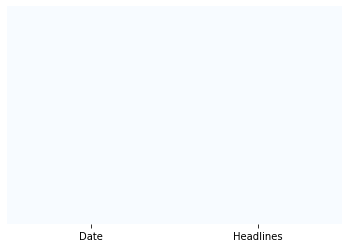

In [74]:
sns.heatmap(news.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [75]:
news = news.reset_index()

In [76]:
news

index       Date                                          Headlines
0         0 2015-01-01  What Can We Expect From Apple Inc. In 2015? 1 ...
1         1 2015-01-02  What to expect from Apple in 2015 beyond its s...
2         2 2015-01-03  Mountie: An inexpensive and innovative way to ...
3         3 2015-01-04  Donald Yacktman on the Sources of Moats, His C...
4         4 2015-01-05  SIM-free iPhone 6, 6 Plus reportedly debuting ...
...     ...        ...                                                ...
2360    169 2021-06-19  Best pre-Prime Day smartwatch deals on Apple W...
2361    170 2021-06-20  iPhone 13 rumors: As Apple's fall event gets c...
2362    171 2021-06-21  Apple is shortening new free TV Plus trials fr...
2363    172 2021-06-22  Google likely to soon face antitrust claims ov...
2364    173 2021-06-23  French court sets date in Apple case over App ...

[2365 rows x 3 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f854c590710>]],
      dtype=object)

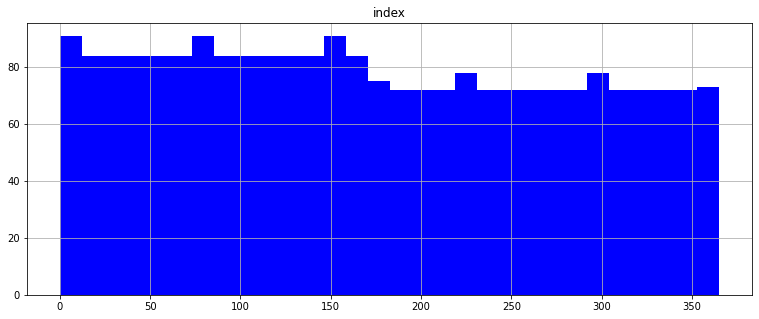

In [77]:
news.hist(bins = 30, figsize = (13,5), color = 'b')

In [78]:
news['length']= news['Headlines'].apply(len)

In [79]:
news.head()

index       Date                                          Headlines  length
0      0 2015-01-01  What Can We Expect From Apple Inc. In 2015? 1 ...     218
1      1 2015-01-02  What to expect from Apple in 2015 beyond its s...    2837
2      2 2015-01-03  Mountie: An inexpensive and innovative way to ...    1192
3      3 2015-01-04  Donald Yacktman on the Sources of Moats, His C...     894
4      4 2015-01-05  SIM-free iPhone 6, 6 Plus reportedly debuting ...    3546

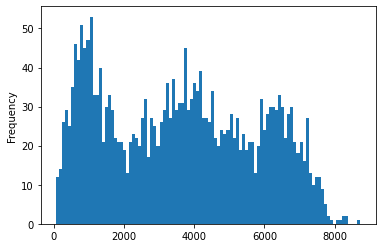

In [80]:
news['length'].plot(bins=100, kind='hist') 

In [81]:
news.describe()

index       length
count  2365.000000  2365.000000
mean    175.051586  3614.158985
std     105.393794  2155.601293
min       0.000000    72.000000
25%      84.000000  1567.000000
50%     168.000000  3617.000000
75%     266.000000  5414.000000
max     365.000000  8734.000000



**FINDING THE SHORTEST HEADLINE**

In [82]:
news[news['length'] == 72]['Headlines'].iloc[0]

'Torch Wealth Management LLC Has $6,285,000 Position in Apple Inc. (AAPL)'

**FINDING THE LONGEST HEADLINE**

In [83]:
news[news['length'] == 8734]['Headlines'].iloc[0]

'Asian shares to pause ahead of China data, US &#039;altitude sickness&#039; European stocks end four-day winning run as UK&#039;s FTSE drags S&amp;P 500 ends down slightly after flirting with record levels again Zynga: More Upside After Strong Q2 &#039;Fortnite&#039; maker sues Apple over app restrictions Apple, Google boot Fortnite from app stores Apple boots Fortnite from App Store, faces lawsuit Apple, Google ban Epic&quot;s Fortnite from app stores, face lawsuit All the Easter eggs hidden in &quot;Nineteen Eighty-Fortnite,&quot; the clever video Epic Games made to taunt Apple amid their heated battle over App Store rules (AAPL) All the Easter eggs hidden in &quot;Nineteen Eighty-Fortnite,&quot; the clever video Epic Games made to taunt Apple amid their heated battle over App Store rules (AAPL) Google just booted &quot;Fortnite&quot; from the Play Store, hours after Apple banned it from the iPhone and iPad App Store (GOOGL) Google just booted &quot;Fortnite&quot; from the Play Stor

**WORD CLOUD**

In [84]:
#make all the headlines into a single string
sentences = news['Headlines'].tolist()
sentences

['What Can We Expect From Apple Inc. In 2015? 1 Reason I Might Be Wrong About the Apple Inc. Retina MacBook Air More Evidence Apple Inc.&quot;s First Quarter Will Be Huge Samsung: New smart TVs in 2015 to run on Tizen OS',
 'What to expect from Apple in 2015 beyond its smartwatch Amazon&quot;s Latest Kindle Unlimited Program Irks Authors Apple Inc. (AAPL) Gets An Upward Revision From Angus Could Palm-Branded Phones Ever Make A Comeback? Here&quot;s another look at Apple&quot;s own iBeacon Stock Update (NYSE:IBM): IBM, Apple Partnership Will Bear Sweet Fruit for Both Stocks Can the &quot;Internet of Things&quot; Help Broadcom Dominate Qualcomm? Rare photos shed light on Steve Jobs, and a young Silicon Valley Apple&quot;s iPad shipments in 2014 could be 8% below 2013 RF Micro Devices, Inc. (RFMD) and TriQuint Semiconductor (TQNT) Merged Into QORVO INC (QRVO) Apple Study: Only 5% Of U.S. iPhone Users Want Apple Watch Why Apple Inc. (AAPL) Stock Took a Small Hit Going Into 2015 Apple Sued 

In [85]:
len(sentences)

2365

In [86]:
sentences_as_one_string= " ".join(sentences)

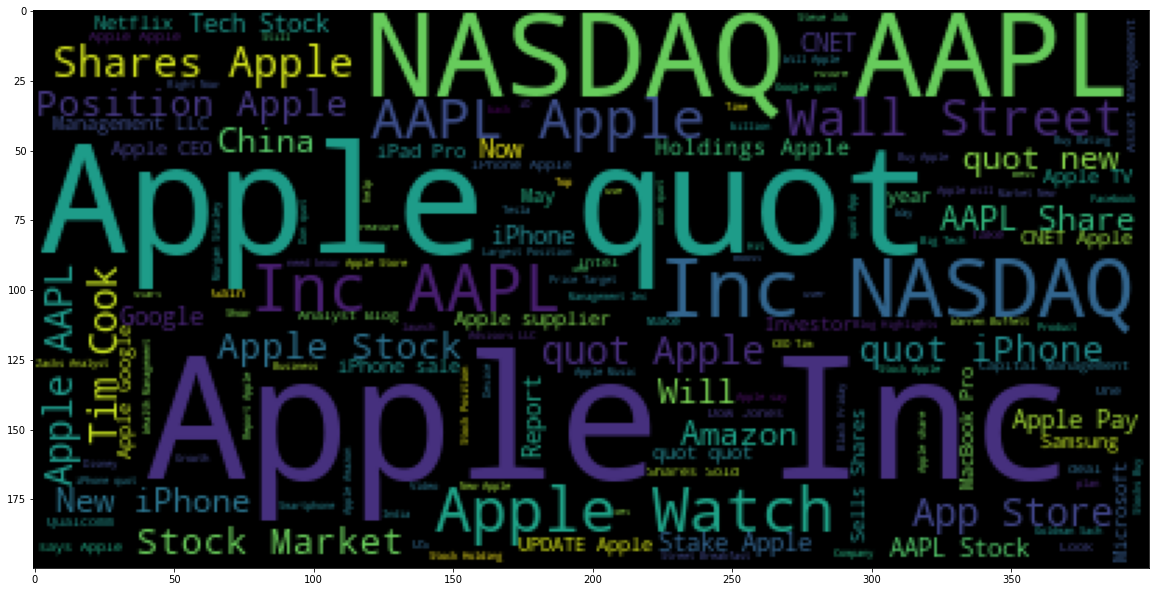

In [87]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

**CREATING A PIPELINE TO REMOVE PUNCTUATIONS, STOP WORDS AND PERFORMING TOKENIZATION**

**Examples:**

TO REMOVE PUNCTUATION 

In [88]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
Test = 'Good morning beautiful people ...:) I am having fun learning Machine learning and AI!!'

In [90]:
Test_punc_removed= [ char for char in Test if char not in string.punctuation ]

In [91]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [92]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

REMOVING STOPWORDS

In [93]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [94]:

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [95]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

TOKENIZATION

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [97]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [98]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


**PERFORMING THE ABOUT MENTIONED DATA CLEANING ON NEWS DATA**

In [99]:
def headline_cleaning(headline):
    Test_punc_removed = [char for char in headline if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [100]:
headliness_clean = news['Headlines'].apply(headline_cleaning)

In [101]:
print(headliness_clean[8]) # show the cleaned up version of index 8 headline

['Samsung', 'reportedly', 'making', 'secret', 'new', 'chip', 'Apple', 'Watch', 'Intelquots', 'Broadwell', 'chip', 'allow', 'Apple', 'finally', 'go', 'Retina', 'MacBook', 'Air', 'sloppy', 'security', 'exposed', 'Applequots', 'supersecret', 'product', 'plans', 'Icahn', 'Fave', 'Apple', 'nobrainer', 'SunEdison', 'Buys', 'Turbines', '16', 'GW', 'Wind', 'Energy', 'Projects', 'Analyst', 'Blog', 'Today', 'Engineering', 'History', 'Jobs', 'Debuts', 'iPhone', 'top', 'wins', 'Tech', 'Emmys', 'awarded', 'BlackBerry', 'Unveils', 'IoT', 'Platform', 'Adds', 'BBM', 'Android', 'Wear', 'Analyst', 'Blog', 'Microsoft', 'MSFT', 'Launches', 'Office', 'Sway', 'iPhone', 'iPad', 'Users', 'US', 'MUJO', 'Puzzle', 'Game', 'Applequots', 'Free', 'iPhone', 'App', 'Week', 'Applequots', 'Fiscal', 'Q1', '2015', 'Results', 'Could', 'quotWickedly', 'Successfulquot', 'Crude', 'Oil', 'Ruble', 'Airlines', 'etc', '15', 'Charts', 'Keep', 'Eyes', 'quot15', 'Apple', 'release', 'iOS', '8', 'update', 'next', 'week', 'CES', 'Chip

In [102]:
print(news['Headlines'][8]) # original version

Samsung is reportedly making a secret new chip in the Apple Watch Intel&quot;s Broadwell chip will allow Apple to finally go Retina with MacBook Air How sloppy security exposed Apple&quot;s super-secret product plans Icahn: Fave Apple a no-brainer SunEdison Buys Turbines for 1.6 GW Wind Energy Projects - Analyst Blog Today in Engineering History: Jobs Debuts iPhone Over the top wins as Tech Emmys are awarded BlackBerry Unveils IoT Platform; Adds BBM to Android Wear - Analyst Blog Microsoft (MSFT) Launches Office Sway For iPhone, iPad Users In US MUJO Puzzle Game: Apple&quot;s Free iPhone App of the Week Apple&quot;s Fiscal Q1 2015 Results Could Be &quot;Wickedly Successful&quot; Crude Oil, Ruble Airlines, etc: 15 Charts to Keep Your Eyes On For &quot;15 Apple to release iOS 8 update next week CES Chipmaker Review: QUALCOMM, Inc (QCOM), Nvidia Corporation (NVDA) And Broadcom Corporation (BRCM) Has Apple Inc. Created Jobs Through Innovation? When Steve Jobs&quot; iPhone launch hijacked C

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
vectorizer = CountVectorizer(analyzer = headline_cleaning)
headline_countvectorizer = vectorizer.fit_transform(news['Headlines']).toarray()

In [105]:
headline_countvectorizer.shape

(2365, 59514)

**MERGING HISTORICAL DATA AND HEADLINES DATA**

In [106]:
data=pd.merge(df,news,on=['Date'],how='outer')

In [107]:
data

Date  ...  length
0    2021-06-09  ...  7036.0
1    2021-06-08  ...  7333.0
2    2021-06-07  ...  7530.0
3    2021-06-04  ...  6805.0
4    2021-06-03  ...  7341.0
...         ...  ...     ...
3279 2021-06-19  ...  2048.0
3280 2021-06-20  ...  2542.0
3281 2021-06-21  ...  6180.0
3282 2021-06-22  ...  6094.0
3283 2021-06-23  ...  6415.0

[3284 rows x 9 columns]

In [108]:
data.dtypes

Date         datetime64[ns]
Close               float64
Volume              float64
Open                float64
High                float64
Low                 float64
index               float64
Headlines            object
length              float64
dtype: object

In [109]:
data['Volume'].fillna(data['Volume'].mean(),inplace=True)
data

Date  ...  length
0    2021-06-09  ...  7036.0
1    2021-06-08  ...  7333.0
2    2021-06-07  ...  7530.0
3    2021-06-04  ...  6805.0
4    2021-06-03  ...  7341.0
...         ...  ...     ...
3279 2021-06-19  ...  2048.0
3280 2021-06-20  ...  2542.0
3281 2021-06-21  ...  6180.0
3282 2021-06-22  ...  6094.0
3283 2021-06-23  ...  6415.0

[3284 rows x 9 columns]

In [110]:
data['Close'].fillna(data['Close'].mean(),inplace=True)
data

Date  ...  length
0    2021-06-09  ...  7036.0
1    2021-06-08  ...  7333.0
2    2021-06-07  ...  7530.0
3    2021-06-04  ...  6805.0
4    2021-06-03  ...  7341.0
...         ...  ...     ...
3279 2021-06-19  ...  2048.0
3280 2021-06-20  ...  2542.0
3281 2021-06-21  ...  6180.0
3282 2021-06-22  ...  6094.0
3283 2021-06-23  ...  6415.0

[3284 rows x 9 columns]

In [111]:
data['Open'].fillna(data['Open'].mean(),inplace=True)
data

Date  ...  length
0    2021-06-09  ...  7036.0
1    2021-06-08  ...  7333.0
2    2021-06-07  ...  7530.0
3    2021-06-04  ...  6805.0
4    2021-06-03  ...  7341.0
...         ...  ...     ...
3279 2021-06-19  ...  2048.0
3280 2021-06-20  ...  2542.0
3281 2021-06-21  ...  6180.0
3282 2021-06-22  ...  6094.0
3283 2021-06-23  ...  6415.0

[3284 rows x 9 columns]

In [112]:
data['High'].fillna(data['High'].mean(),inplace=True)
data

Date  ...  length
0    2021-06-09  ...  7036.0
1    2021-06-08  ...  7333.0
2    2021-06-07  ...  7530.0
3    2021-06-04  ...  6805.0
4    2021-06-03  ...  7341.0
...         ...  ...     ...
3279 2021-06-19  ...  2048.0
3280 2021-06-20  ...  2542.0
3281 2021-06-21  ...  6180.0
3282 2021-06-22  ...  6094.0
3283 2021-06-23  ...  6415.0

[3284 rows x 9 columns]

In [113]:
data['Low'].fillna(data['Low'].mean(),inplace=True)
data

Date  ...  length
0    2021-06-09  ...  7036.0
1    2021-06-08  ...  7333.0
2    2021-06-07  ...  7530.0
3    2021-06-04  ...  6805.0
4    2021-06-03  ...  7341.0
...         ...  ...     ...
3279 2021-06-19  ...  2048.0
3280 2021-06-20  ...  2542.0
3281 2021-06-21  ...  6180.0
3282 2021-06-22  ...  6094.0
3283 2021-06-23  ...  6415.0

[3284 rows x 9 columns]

In [114]:
data.isnull().sum()

Date           0
Close          0
Volume         0
Open           0
High           0
Low            0
index        919
Headlines    919
length       919
dtype: int64

In [115]:
del data['index']

In [116]:
del data['length']

In [117]:
data

Date  ...                                          Headlines
0    2021-06-09  ...  athenahealth is set to support the iOS 15 Feat...
1    2021-06-08  ...  Apple, Chinese manufacturers in talks on US ca...
2    2021-06-07  ...  Apple&quot;s new &quot;private relay&quot; fea...
3    2021-06-04  ...  Global equities nearly grasp all-time record, ...
4    2021-06-03  ...  Buy RH Stock on the Dip Before Q1 Earnings for...
...         ...  ...                                                ...
3279 2021-06-19  ...  Best pre-Prime Day smartwatch deals on Apple W...
3280 2021-06-20  ...  iPhone 13 rumors: As Apple's fall event gets c...
3281 2021-06-21  ...  Apple is shortening new free TV Plus trials fr...
3282 2021-06-22  ...  Google likely to soon face antitrust claims ov...
3283 2021-06-23  ...  French court sets date in Apple case over App ...

[3284 rows x 7 columns]

In [118]:
data.Headlines = data.Headlines.fillna('') 

In [119]:
data.isnull().sum()

Date         0
Close        0
Volume       0
Open         0
High         0
Low          0
Headlines    0
dtype: int64

In [120]:
duplicate2=data.duplicated()
print(duplicate2.sum())
data[duplicate2]


23


Date  ...                                          Headlines
384  2019-11-29  ...  UPDATE 1-Apple &quot;taking a deeper look&quot...
386  2019-11-27  ...  A Surprising Blind Survey found that the major...
388  2019-11-26  ...  3 Retail Stocks to Consider Buying During the ...
390  2019-11-25  ...  3 Blue-Chip Tech Stocks to Buy Right Now with ...
398  2019-11-19  ...  Apple Partners with the Non-Profit &quot;100ca...
400  2019-11-18  ...  MGG 789: I Got Caught ... Learning! 3 Dow Stoc...
402  2019-11-15  ...  Apple 16-inch MacBook Pro teardown shows off M...
404  2019-11-14  ...  Apple hires Trump donor as lobbyist in hopes o...
408  2019-11-12  ...  President Trump will reportedly Tour Apple&quo...
410  2019-11-11  ...  Apple Is Extremely Overvalued, But Likely To G...
412  2019-11-08  ...  The free Roku app on Apple Watch is now availa...
418  2019-11-05  ...  Buffett&quot;s Cash Mystery: Morgan Stanley Fi...
420  2019-11-04  ...  Google (GOOGL) Enters Wearables Race by Acquir...
3077 2019-11-02  ...  Wearables Spending Will Jump 27% in 2020, and ...
3079 2019-11-03  ...  TDIV: A Tech Play For 2020 Can Uber Money Comp...
3081 2019-11-09  ...  Amazon: The Secret to Bezos&quot;s Success Mar...
3083 2019-11-10  ...  Wedbush: Is TV streaming big enough for both A...
3085 2019-11-16  ...  Warren Buffett&quot;s Berkshire Hathaway Trims...
3087 2019-11-17  ...  Trump to tour Apple&quot;s Austin manufacturin...
3089 2019-11-23  ...  Should Apple Take a Cue from PayPal&quot;s Acq...
3091 2019-11-24  ...  Better Buy: Universal Display vs. Applied Mate...
3093 2019-11-28  ...  Costco Black Friday 2019: Here Are The Best De...
3095 2019-11-30  ...  Cyber Monday 2019 iPhone Deals: Amazon, Best B...

[23 rows x 7 columns]

In [121]:
data = data.drop_duplicates()
data.head(5)

Date  ...                                          Headlines
0 2021-06-09  ...  athenahealth is set to support the iOS 15 Feat...
1 2021-06-08  ...  Apple, Chinese manufacturers in talks on US ca...
2 2021-06-07  ...  Apple&quot;s new &quot;private relay&quot; fea...
3 2021-06-04  ...  Global equities nearly grasp all-time record, ...
4 2021-06-03  ...  Buy RH Stock on the Dip Before Q1 Earnings for...

[5 rows x 7 columns]

In [122]:
duplicate2=data.duplicated()
print(duplicate2.sum())
data[duplicate2]

0


Empty DataFrame
Columns: [Date, Close, Volume, Open, High, Low, Headlines]
Index: []